<a href="https://colab.research.google.com/github/SantoshAhirrao/Enron/blob/master/Enron_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Colab Preparation

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1kspwcO88yCvb_dXNnRGfhw36_4FCMCiB'}) # replace the id with id of file you want to access
downloaded.GetContentFile('email_df.csv') 

In [6]:
import os

os.chdir("/content/")

# os.chdir("./content/drive/My Drive/Colab Notebooks") # Advisable to have such path

Jupyter Notebook

Import Libs

In [7]:
import re
import os, sys, email
import numpy as np 
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
#import plotly
#plotly.offline.init_notebook_mode()
#import plotly.graph_objs as go
import wordcloud

# Network analysis
import networkx as nx

# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
pd.set_option('display.max_columns', None)   # To see all the columns of data frame

### 1. Loading and cleaning data

In [12]:
import pandas as pd
import numpy as np
import nltk
from gensim import corpora
from functools import reduce
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent","hou", "ect"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
df = pd.read_csv("/content/email_df.csv")

In [11]:
df.head(2)

,Unnamed: 0,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,1232,allen-p/deleted_items/1.,<21543395.1075855374340.JavaMail.evans@thyme>,2001-12-30 18:19:42+00:00,frozenset({'pallen70@hotmail.com'}),frozenset({'pallen@enron.com'}),Fwd: Bishops Corner,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,"""phillip allen"" <pallen70@hotmail.com>@ENRON",pallen@enron.com,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Del...",Allen-P,pallen (Non-Privileged).pst,"\n \n>From: ""Greg Thorse"" \n>To: \n>CC: ""Phill...",allen-p
1,1233,allen-p/deleted_items/10.,<25363451.1075855374674.JavaMail.evans@thyme>,2001-12-28 01:16:46+00:00,frozenset({'arsystem@mailman.enron.com'}),frozenset({'k..allen@enron.com'}),Your Approval is Overdue: Access Request for m...,1.0,text/plain; charset=us-ascii,7bit,ARSystem <ARSystem@mailman.enron.com>@ENRON,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...",NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Del...",Allen-P,pallen (Non-Privileged).pst,This request has been pending your approval fo...,allen-p


# Vectorize the data

In [14]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 500,
    stop_words = stop
)
tfidf.fit(df['content'].dropna())
text = tfidf.transform(df['content'].dropna())

# Hyperparameter tuning for optimal number of clusters¶

In [16]:
max_k=32
data=text
iters = range(4, max_k+1, 2)

sse = []
for k in iters:
    sse_val = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_
    sse.append(sse_val)
    print('Fit {} clusters, sse {}'.format(k,sse_val))

Fit 4 clusters, sse 47789.459092252466
Fit 6 clusters, sse 46199.97285044818
Fit 8 clusters, sse 45353.04446589117
Fit 10 clusters, sse 44672.98420485889
Fit 12 clusters, sse 43876.29836624063
Fit 14 clusters, sse 43686.545986041514
Fit 16 clusters, sse 42366.184433537885
Fit 18 clusters, sse 41890.569005734615
Fit 20 clusters, sse 41656.62202427187
Fit 22 clusters, sse 41498.1650032652
Fit 24 clusters, sse 40938.06425179904
Fit 26 clusters, sse 40807.0063957476
Fit 28 clusters, sse 40898.42123675426
Fit 30 clusters, sse 39483.92096970206
Fit 32 clusters, sse 39546.43334392076


# Plot SSE vs number of clusters

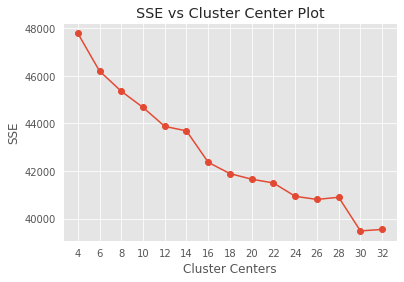

In [19]:

plt.style.use("ggplot")
f, ax = plt.subplots(1, 1)
ax.plot(iters, sse, marker='o')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('SSE')
ax.set_title('SSE vs Cluster Center Plot')
plt.savefig('/content/Clustering-SSE.png')
plt.show()

# Model for optimal number of clusters

In [22]:
clusters = MiniBatchKMeans(n_clusters=24, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

# Print clusters with top terms

In [25]:
labels=tfidf.get_feature_names()
n_terms=10

new_df = pd.DataFrame(data.todense())
new_df['clusters'] = clusters
# new_df.to_csv('/content/clusters.csv')

In [26]:
clusters_mean = new_df.groupby(['clusters']).mean()

In [27]:
clusters_mean.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.006412,0.005129,0.010841,0.005222,0.001824,0.001459,0.001847,0.001541,0.001937,0.002867,0.010410,0.004335,0.010080,0.012228,0.003768,0.004575,0.007426,0.004000,0.004828,0.005460,0.003846,0.010580,0.002486,0.011967,0.011880,0.004834,0.003400,0.003595,0.005101,0.005952,0.004578,0.004374,0.004262,0.003700,0.010925,0.005168,0.002032,0.001951,0.003233,0.003434,0.006233,0.002564,0.007843,0.003417,0.005626,0.002397,0.003280,0.002120,0.010590,0.011657,0.008568,0.002678,0.002629,0.005656,0.009314,0.004813,0.000026,0.000121,0.006602,0.018457,0.002685,0.005615,0.000655,0.007562,0.001908,0.003709,0.005382,0.000117,0.008631,0.002434,0.003173,0.010981,0.019733,0.005295,0.005244,0.003814,0.011355,0.000008,0.006541,0.001135,0.008314,0.001186,0.004478,0.002159,0.000424,0.000759,0.001181,0.013567,0.005525,0.004482,0.002647,0.036662,0.002647,0.002662,0.005839,0.007137,0.000004,0.000004,0.005804,0.000323,0.000901,0.008412,0.008425,0.010039,0.001368,0.008573,0.005711,0.004152,0.015453,0.001034,0.004270,0.001401,0.000654,0.017575,0.011398,0.004568,0.004318,0.013099,0.004480,0.007099,0.000203,0.013340,0.001620,0.008120,0.006839,0.006269,0.010616,0.000454,0.002519,0.007347,0.005252,0.017079,0.009102,0.007343,0.005383,0.005212,0.005626,0.002783,0.003390,0.008647,0.009553,0.020244,0.012814,0.000000,0.010483,0.007632,0.004839,0.010666,0.006547,0.001902,0.001482,0.000527,0.010974,0.002405,0.003772,0.002442,0.001195,0.015844,0.007176,0.010867,0.001620,0.007502,0.006660,0.000074,0.016557,0.002864,0.006512,0.003849,0.003708,0.002086,0.005967,0.005196,0.006397,0.004257,0.004228,0.005950,0.004451,0.005

In [28]:
for i,r in clusters_mean.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))


Cluster 0
time,one,need,let,get,thanks,would,call,please,know

Cluster 1
portland,date,scheduling,iso,messages,start,final,hour,hourahead,schedules

Cluster 2
link,news,research,email,asp,click,pdf,html,www,com

Cluster 3
message,call,2002,conference,thanks,30,january,00,please,meeting

Cluster 4
stock,center,com,unknown,company,alias,database,employees,dbcaps97data,enron

Cluster 5
need,com,services,attached,michael,enron,call,please,713,office

Cluster 6
stock,million,funds,energy,california,made,company,consumers,employees,enron

Cluster 7
20,contract,2002,power,capacity,02,ena,energy,000,gas

Cluster 8
new,special,unsubscribe,receive,email,free,com,click,09,image

Cluster 9
face,arial,href,align,size,width,tr,br,td,font

Cluster 10
enron,10,11,06,january,time,30,2002,pm,00

Cluster 11
may,message,use,contract,mail,corp,com,enron,intended,recipient

Cluster 12
click,market,800,00,com,20,energy,us,image,09

Cluster 13
review,name,type,corp,asp,page,com,enron,id,request

Cluster 14
p